# KNN CLASSIFICATION FOR IMAGE DATASET

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

from sklearn.model_selection import train_test_split, cross_validate

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix

from PIL import Image

import time


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Reading in data and splitting into training and test sets

In [3]:
train_set = pd.read_csv('/content/drive/My Drive/Project_Digit_Recognition/mnist_train.csv', header = None)
test_set = pd.read_csv('/content/drive/My Drive/Project_Digit_Recognition/mnist_test.csv', header = None)

train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X_train = train_set.loc[:,1:]
y_train = train_set.loc[:,0]
X_test = test_set.loc[:,1:]
y_test = test_set.loc[:,0]

X_train_array = X_train.values
X_test_array = X_test.values
y_train_array = y_train.values
y_test_array = y_test.values

## Deskewing the data
https://fsix.github.io/mnist/Deskewing.html

In [0]:
from scipy.ndimage import interpolation

def moments(image):
    c0,c1 = np.mgrid[:image.shape[0],:image.shape[1]] # A trick in numPy to create a mesh grid
    totalImage = np.sum(image) #sum of pixels
    m0 = np.sum(c0*image)/totalImage #mu_x
    m1 = np.sum(c1*image)/totalImage #mu_y
    m00 = np.sum((c0-m0)**2*image)/totalImage #var(x)
    m11 = np.sum((c1-m1)**2*image)/totalImage #var(y)
    m01 = np.sum((c0-m0)*(c1-m1)*image)/totalImage #covariance(x,y)
    mu_vector = np.array([m0,m1]) # Notice that these are \mu_x, \mu_y respectively
    covariance_matrix = np.array([[m00,m01],[m01,m11]]) # Do you see a similarity between the covariance matrix
    return mu_vector, covariance_matrix

#def deskew(image):
#    c,v = moments(image)
#    alpha = v[0,1]/v[0,0]
#    affine = np.array([[1,0],[alpha,1]])
#    ocenter = np.array(image.shape)/2.0
#    offset = c-np.dot(affine,ocenter)
#    return interpolation.affine_transform(image,affine,offset=offset)

def deskew(image):
    c,v = moments(image)
    alpha = v[0,1]/v[0,0]
    affine = np.array([[1,0],[alpha,1]])
    ocenter = np.array(image.shape)/2.0
    offset = c-np.dot(affine,ocenter)
    img = interpolation.affine_transform(image,affine,offset=offset)
    return (img - img.min()) / (img.max() - img.min())

In [0]:
examples = (133, 0), (178,1), (6546, 2), (4865,3), (698,4) , (328,5), (18827,6), (1646,7) , (2456, 8), (6597, 9)

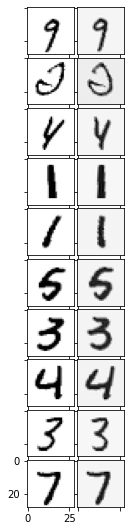

In [7]:
from mpl_toolkits.axes_grid1 import AxesGrid
grid = AxesGrid(plt.figure(figsize=(8,15)), 141,  # similar to subplot(141)
                    nrows_ncols=(10, 2),
                    axes_pad=0.05,
                    label_mode="1",
                    )

for examplenum,num in examples:
    im = grid[2*num].imshow(X_train_array[examplenum].reshape(28,28),cmap='Greys')
    im2 = grid[2*num+1].imshow(deskew(X_train_array[examplenum].reshape(28,28)),cmap='Greys')

In [0]:
def deskewAll(X):
    currents = []
    for i in range(len(X)):
        currents.append(deskew(X[i].reshape(28,28)).flatten())
    return np.array(currents)

X_train_deskewed = deskewAll(X_train_array)
X_test_deskewed = deskewAll(X_test_array)

## Analysis of Skewed and Deskewed Data

### Analysis of skewed train and test data for Nearest Neighbor = 2, 5, 10

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [9]:
start = time.time()

KNN2 = KNeighborsClassifier(n_neighbors=2 )
KNN5 = KNeighborsClassifier(n_neighbors=5)
KNN10= KNeighborsClassifier(n_neighbors=10)

KNN2.fit(X_train, y_train)
KNN5.fit(X_train, y_train)
KNN10.fit(X_train, y_train)

print('KNN2 Error %: \t \t', (1-KNN2.score(X_test, y_test))*100)
print('KNN5 Error %: \t \t', (1-KNN5.score(X_test, y_test))*100)
print('KNN10 Error %: \t \t', (1-KNN10.score(X_test, y_test))*100)
print((time.time() - start)/60, 'minutes')

KNN2 Error %: 	 	 3.73
KNN5 Error %: 	 	 3.1200000000000006
KNN10 Error %: 	 	 3.3499999999999974
51.71373980840047 minutes


Analysis of Deskewed train and test data for Nearest Neighbor = 2, 5, 10

In [9]:
start = time.time()

KNN2_deskewed = KNeighborsClassifier(n_neighbors=2 )
KNN5_deskewed = KNeighborsClassifier(n_neighbors=5)
KNN10_deskewed= KNeighborsClassifier(n_neighbors=10)

KNN2_deskewed.fit(X_train_deskewed, y_train)
KNN5_deskewed.fit(X_train_deskewed, y_train)
KNN10_deskewed.fit(X_train_deskewed, y_train)

print('KNN2 Error for deskewed data %: \t \t', (1-KNN2_deskewed.score(X_test_deskewed, y_test))*100)
print('KNN5 Error for deskewed data %: \t \t', (1-KNN5_deskewed.score(X_test_deskewed, y_test))*100)
print('KNN10 Error for deskewed data %: \t \t', (1-KNN10_deskewed.score(X_test_deskewed, y_test))*100)
print((time.time() - start)/60, 'minutes')

KNN2 Error for deskewed data %: 	 	 1.9299999999999984
KNN5 Error for deskewed data %: 	 	 1.6900000000000026
KNN10 Error for deskewed data %: 	 	 1.870000000000005
56.60626016457876 minutes


### Analysis of skewed data for different distances

#### Predictions for Nearest neighbor=5 for Minkowski Distance

In [0]:
y_pred = KNN5_deskewed.predict(X_test_deskewed)

#### Confusion matrix and classification report for Nearest neighbor=5 for Minkowski Distance

https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

In [33]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 975    0    1    0    0    0    3    1    0    0]
 [   0 1132    2    0    0    0    1    0    0    0]
 [   6    0 1013    2    1    0    0    6    4    0]
 [   1    0    2  992    0    5    0    4    4    2]
 [   0    1    0    0  960    0    2    1    0   18]
 [   4    0    0    4    2  876    3    1    0    2]
 [   6    3    0    0    2    1  946    0    0    0]
 [   1    1    3    1    2    0    0 1015    0    5]
 [   6    0    1    1    3    4    1    3  952    3]
 [   1    3    1    4   10    7    1   10    2  970]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99   

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

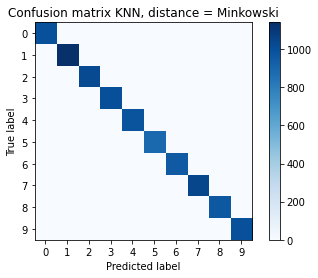

In [19]:
disp = plot_confusion_matrix(KNN5_deskewed, X_test_deskewed, y_pred, cmap=plt.cm.Blues, include_values= False)
disp.ax_.set_title("Confusion matrix KNN, distance = Minkowski")

plt.show()

#### Confusion matrix and classification report for Nearest neighbor=5 for Manhattan Distance

In [13]:
start = time.time()

KNN5_deskewed_man = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

KNN5_deskewed_man.fit(X_train_deskewed, y_train)


print('KNN5 Error for deskewed data %: \t \t', (1-KNN5_deskewed_man.score(X_test_deskewed, y_test))*100)
print((time.time() - start)/60, 'minutes')

KNN5 Error for deskewed data %: 	 	 2.510000000000001
18.787776958942413 minutes


https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric

In [0]:
y_predm = KNN5_deskewed_man.predict(X_test_deskewed)

In [39]:
print(confusion_matrix(y_test, y_predm))
print(classification_report(y_test, y_predm))

[[ 973    0    1    0    0    1    4    1    0    0]
 [   0 1130    1    1    0    0    2    1    0    0]
 [   6    2 1006    2    1    0    2   10    3    0]
 [   2    1    2  979    0   11    0    7    6    2]
 [   1    5    0    0  945    0    5    1    0   25]
 [   5    0    0    6    3  868    7    1    0    2]
 [   8    2    0    0    2    1  945    0    0    0]
 [   1    7    5    0    3    0    0 1005    0    7]
 [   6    2    2   10    3    8    1    8  931    3]
 [   4    4    1    7    9    3    1   10    3  967]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.98   

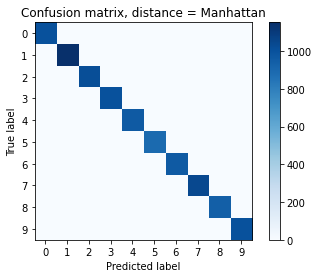

In [18]:
disp = plot_confusion_matrix(KNN5_deskewed_man, X_test_deskewed, y_predm, cmap=plt.cm.Blues, include_values= False)
disp.ax_.set_title("Confusion matrix, distance = Manhattan")

plt.show()